# Text Visualizations

Text visualizations can be used when the textual content needs to be highlighted. For example, a football match's participants can be displayed as a visualization to group them based on what they are - a team, a stadium, a coach or a player.

In [1]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import numpy as np
import os
import pandas as pd
import sys

The running example will be the line-ups of two football matches. They are text-intensive and difficul to represent otherwise. At the same time, a text visualization can add to the interpretability of simply writing out the line-ups, as shown further down.

In [2]:
"""
The first team - the home team.
"""

data = {
    'team':        [ 'Watford' ],
    'coach':       [ 'Quique Sánchez Flores' ],
    'stadium':     [ 'Vicarage Road' ],
    'player':      [ [ "Ben Foster", "Kiko Femenia", "Craig Dawson", "Christian Kabasele", "Jose Holebas", "Abdoulaye Doucoure", "Etienne Capoue", "Will Hughes", "Tom Cleverley", "Gerard Deulofeu", "Andre Gray" ] ],
    'substitute': [ [ "Heurelho Gomes", "Daryl Janmaat", "Adrian Mariappa", "Nathaniel Chalobah", "Ismaila Sarr", "Dimitri Foulquier", "Roberto Pereyra" ]  ]
}

home_df = pd.DataFrame.from_dict(data, orient='index').transpose()

"""
Convert the player list into multiple columns.
"""
player_df = home_df.player.apply(pd.Series)
player_df.columns = ['player'] * len(data['player'][0])
home_df.drop(['player'], axis=1, inplace=True) # drop the original player column

"""
Convert the substitute list into multiple columns.
"""
substitute_df = home_df.substitute.apply(pd.Series)
substitute_df.columns = ['substitute'] * len(data['substitute'][0])
home_df.drop(['substitute'], axis=1, inplace=True) # drop the original substitute column

"""
Merge the player and substitute list into the original dataframe.
"""
home_df = home_df.transpose()
home_df = pd.concat([ home_df, player_df.transpose() ])
home_df = pd.concat([ home_df, substitute_df.transpose() ])
home_df

,0
team,Watford
coach,Quique Sánchez Flores
stadium,Vicarage Road
player,Ben Foster
player,Kiko Femenia
player,Craig Dawson
player,Christian Kabasele
player,Jose Holebas
player,Abdoulaye Doucoure
player,Etienne Capoue


In [3]:
"""
The second team - the away team.
"""

data = {
    'team':       [ 'Arsenal' ],
    'coach':      [ 'Unai Emery' ],
    'stadium':    [  ],
    'player':     [ [ "Bernd Leno", "Ainsley Maitland-Niles", "Sokratis", "David Luiz", "Sead Kolasinac", "Granit Xhaka", "Matteo Guendouzi", "Mesut Ozil", "Dani Ceballos", "Nicolas Pepe", "Pierre-Emerick Aubameyang" ] ],
    'substitute': [ [ "Lucas Torreira", "Calum Chambers", "Reiss Nelson", "Emiliano Martinez", "Joe Willock", "Gabriel Martinelli", "Bukayo Saka" ] ]
}

away_df = pd.DataFrame.from_dict(data, orient='index').transpose()

"""
Convert the player list into multiple columns.
"""
player_df = away_df.player.apply(pd.Series)
player_df.columns = ['player'] * len(data['player'][0])
away_df.drop(['player'], axis=1, inplace=True) # drop the original player column

"""
Convert the substitute list into multiple columns.
"""
substitute_df = away_df.substitute.apply(pd.Series)
substitute_df.columns = ['substitute'] * len(data['substitute'][0])
away_df.drop(['substitute'], axis=1, inplace=True) # drop the original substitute column

"""
Merge the player and substitute list into the original dataframe.
"""
away_df = away_df.transpose()
away_df = pd.concat([ away_df, player_df.transpose() ])
away_df = pd.concat([ away_df, substitute_df.transpose() ])
away_df

,0
team,Arsenal
coach,Unai Emery
stadium,None
player,Bernd Leno
player,Ainsley Maitland-Niles
player,Sokratis
player,David Luiz
player,Sead Kolasinac
player,Granit Xhaka
player,Matteo Guendouzi


In [4]:
"""
The two dataframes are joined together.
The home and away dataframes make up a column each.
The participant type becomes the index.
"""

df = pd.concat([ home_df, away_df ], axis=1)
df.reset_index(inplace=True)
df.columns = [ 'participant', 'home', 'away' ]
df.set_index('participant', inplace=True)
df

,home,away
participant,,
team,Watford,Arsenal
coach,Quique Sánchez Flores,Unai Emery
stadium,Vicarage Road,None
player,Ben Foster,Bernd Leno
player,Kiko Femenia,Ainsley Maitland-Niles
player,Craig Dawson,Sokratis
player,Christian Kabasele,David Luiz
player,Jose Holebas,Sead Kolasinac
player,Abdoulaye Doucoure,Granit Xhaka


In the visualization, special care is paid to ensuring that data is separated well using the proximity Gestalt principle. The different participant groups are separated by a wide white vertical space. The categories are separated by a wide vertical space.

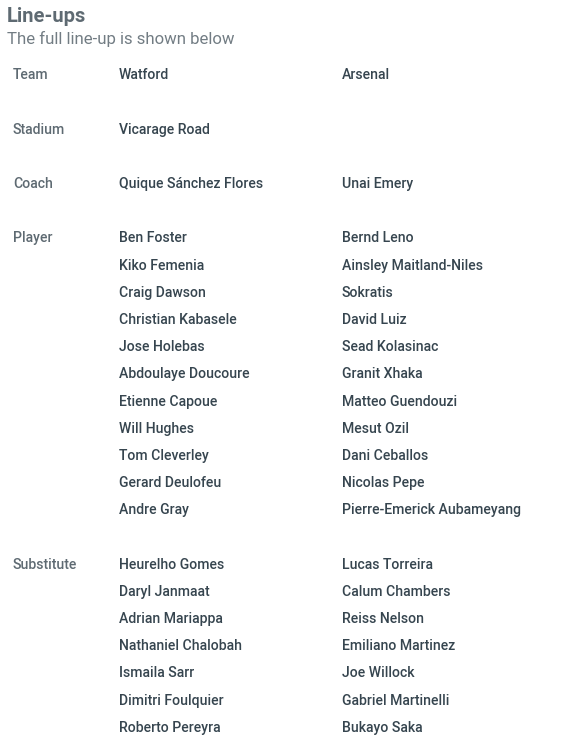

In [5]:
plt.style.use(os.path.join(sys.path[0], "fire.style"))
plt.style.reload_library()

plt.figure(figsize=(10,10))

plt.xlim(0, 10)
plt.ylim(0, 10)

"""
Style.
"""
pad = 0.1 # the padding from the left border
row_height = 0.5 # the height of each row

"""
Each group is displayed separately.
"""
plt.gca().invert_yaxis() # invert the y-axis
rows = 0
for group in [ 'team', 'stadium', 'coach', 'player', 'substitute' ]:
    rows += 1 + (2 * row_height if rows > 0 else 0)
    plt.text(pad, rows * row_height, group.capitalize(),
             fontweight=600, alpha=0.8)
    
    """
    Go through each row in the group.
    Then, for each category, print the name of the player.
    """
    categories = df.columns
    for i, (_, row) in enumerate(df.loc[[group]].iterrows()):
        rows += 1 if i else 0
        for index, category in enumerate(categories):
            plt.text(2 + index * 4, rows * row_height, row[category],
                     fontweight=600)

plt.axis('off')
plt.title('Line-ups', loc='left', fontweight='bold', alpha=0.8,
         pad=30) # pad to make space for a subtitle
ax = plt.gca()
plt.text(0, 1.01, 'The full line-up is shown below',
         fontsize='large', alpha=0.7,
         horizontalalignment='left', verticalalignment='bottom',
         transform=ax.transAxes)
plt.show()

This visualization does not tell a story on its own. However, it can be used similarly to a heatmap by assigning values to different participants. In this continuation of the above example, random values are assigned to the participants and used to create a heatmap textual visualization.

In [6]:
"""
Generate random values for the home team.
"""
values = np.random.normal(0.5, 0.5, len(home_df))
values = (values - min(values)) / (max(values) - min(values))

"""
Add them to a new dataframe.
"""
value_home_df = home_df.copy()
value_home_df.columns = [ 'name' ]
value_home_df['value'] = values
value_home_df

,name,value
team,Watford,0.439347
coach,Quique Sánchez Flores,0.526772
stadium,Vicarage Road,0.321683
player,Ben Foster,1.000000
player,Kiko Femenia,0.172611
player,Craig Dawson,0.000000
player,Christian Kabasele,0.491418
player,Jose Holebas,0.627770
player,Abdoulaye Doucoure,0.252583
player,Etienne Capoue,0.298913


In [7]:
"""
Generate random values for the away team.
"""
values = np.random.normal(0.5, 0.5, len(away_df))
values = (values - min(values)) / (max(values) - min(values))

"""
Add them to a new dataframe.
"""
value_away_df = away_df.copy()
value_away_df.columns = [ 'name' ]
value_away_df['value'] = values
value_away_df

,name,value
team,Arsenal,0.047322
coach,Unai Emery,0.302927
stadium,None,0.047630
player,Bernd Leno,0.559000
player,Ainsley Maitland-Niles,0.364377
player,Sokratis,0.385832
player,David Luiz,0.238173
player,Sead Kolasinac,0.491951
player,Granit Xhaka,0.140102
player,Matteo Guendouzi,0.427529


In [8]:
"""
The two dataframes are joined together.
The home and away dataframes make up two columns each.
A multi-level index is created to separate them neatly.
The participant type becomes the index.
"""

df = pd.concat([ value_home_df, value_away_df ], axis=1)
df.reset_index(inplace=True)
columns = [ ('participant', 'participant'), ('home', 'name'), ('home', 'value'), ('away', 'name'), ('away', 'value') ]
df.columns = pd.MultiIndex.from_tuples(columns)
df.set_index(('participant','participant'), inplace=True)
df.index.name = 'participant'
df

home                                 away  \
                              name     value                       name   
participant                                                               
team                       Watford  0.439347                    Arsenal   
coach        Quique Sánchez Flores  0.526772                 Unai Emery   
stadium              Vicarage Road  0.321683                       None   
player                  Ben Foster  1.000000                 Bernd Leno   
player                Kiko Femenia  0.172611     Ainsley Maitland-Niles   
player                Craig Dawson  0.000000                   Sokratis   
player          Christian Kabasele  0.491418                 David Luiz   
player                Jose Holebas  0.627770             Sead Kolasinac   
player          Abdoulaye Doucoure  0.252583               Granit Xhaka   
player              Etienne Capoue  0.298913           Matteo Guendouzi   
player                 Will Hughes  0.568340                 Mesut Ozil   
player               Tom Cleverley  0.211016              Dani Ceballos   
player             Gerard Deulofeu  0.795794               Nicolas Pepe   
player                  Andre Gray  0.763206  Pierre-Emerick Aubameyang   
substitute          Heurelho Gomes  0.620755             Lucas Torreira   
substitute           Daryl Janmaat  0.347869             Calum Chambers   
substitute         Adrian Mariappa  0.544584               Reiss Nelson   
substitute      Nathaniel Chalobah  0.184452          Emiliano Martinez   
substitute            Ismaila Sarr  0.527343                Joe Willock   
substitute       Dimitri Foulquier  0.786752         Gabriel Martinelli   
substitute         Roberto Pereyra  0.953467                Bukayo Saka   

                       
                value  
participant            
team         0.047322  
coach        0.302927  
stadium      0.047630  
player       0.559000  
player       0.364377  
player       0.385832  
player       0.238173  
player       0.491951  
player       0.140102  
player       0.427529  
player       0.968544  
player       0.195381  
player       1.000000  
player       0.373698  
substitute   0.387869  
substitute   0.530216  
substitute   0.350555  
substitute   0.000000  
substitute   0.546216  
substitute   0.813461  
substitute   0.100467

In the heatmap, it is important that the labels remain readable. Therefore a minimum alpha has to be provided.

KeyError: "None of [Index(['subtsitute'], dtype='object', name='participant')] are in the [index]"

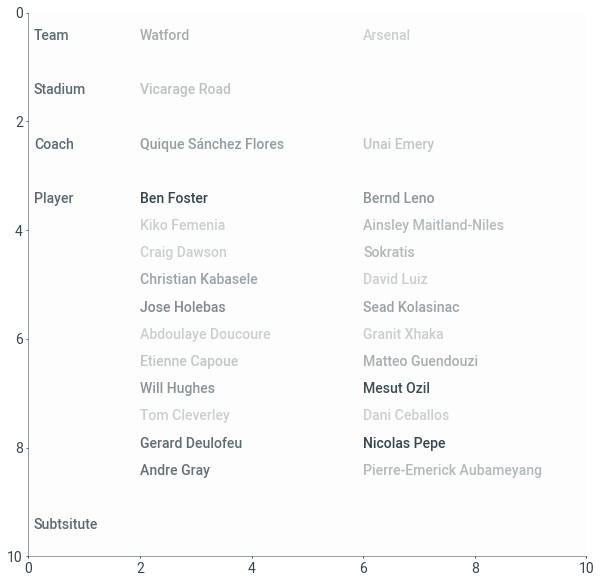

In [9]:
plt.style.use(os.path.join(sys.path[0], "fire.style"))
plt.style.reload_library()

plt.figure(figsize=(10,10))

plt.xlim(0, 10)
plt.ylim(0, 10)

"""
Style.
"""
pad = 0.1 # the padding from the left border
row_height = 0.5 # the height of each row

"""
Each group is displayed separately.
"""
plt.gca().invert_yaxis() # invert the y-axis
rows = 0
for group in [ 'team', 'stadium', 'coach', 'player', 'substitute' ]:
    rows += 1 + (2 * row_height if rows > 0 else 0)
    plt.text(pad, rows * row_height, group.capitalize(),
             fontweight=600, alpha=0.8)
    
    """
    Go through each row in the group.
    Then, for each category, print the name of the player.
    """
    categories = {
        ('home', 'name'): ('home', 'value'),
        ('away', 'name'): ('away', 'value'),
    }
    for i, (_, row) in enumerate(df.loc[[group]].iterrows()):
        rows += 1 if i else 0
        for index, (category, value) in enumerate(categories.items()):
            plt.text(2 + index * 4, rows * row_height, row[category],
                     fontweight=600,
                     color='C3', alpha=max(row[value], 0.25))

plt.axis('off')
plt.title('Line-ups', loc='left', fontweight='bold', alpha=0.8,
         pad=30) # pad to make space for a subtitle
ax = plt.gca()
plt.text(0, 1.01, 'The full line-up is shown below',
         fontsize='large', alpha=0.7,
         horizontalalignment='left', verticalalignment='bottom',
         transform=ax.transAxes)
plt.show()

A different kind of story can be provided by restricting the values to be between 0 and 1. In this scenario, the table could represent the players that were captured by the APD algorithm, for instance.

In the following example, the home team is assumed to be the minority side - its participants have a lower chance of being picked.

In [ ]:
"""
Generate random values for the home team.
"""
values = np.random.choice( [ 0, 0, 0, 1 ], len(home_df))

"""
Add them to a new dataframe.
"""
boolean_home_df = home_df.copy()
boolean_home_df.columns = [ 'name' ]
boolean_home_df['value'] = values
boolean_home_df

In [ ]:
"""
Generate random values for the away team.
"""
values = np.random.choice( [ 0, 1, 1, 1 ], len(home_df))

"""
Add them to a new dataframe.
"""
boolean_away_df = away_df.copy()
boolean_away_df.columns = [ 'name' ]
boolean_away_df['value'] = values
boolean_away_df

In [ ]:
"""
The two dataframes are joined together.
The home and away dataframes make up two columns each.
A multi-level index is created to separate them neatly.
The participant type becomes the index.
"""

df = pd.concat([ boolean_home_df, boolean_away_df ], axis=1)
df.reset_index(inplace=True)
columns = [ ('participant', 'participant'), ('home', 'name'), ('home', 'value'), ('away', 'name'), ('away', 'value') ]
df.columns = pd.MultiIndex.from_tuples(columns)
df.set_index(('participant','participant'), inplace=True)
df.index.name = 'participant'
df

In this case, the difference between the participants does not have to be as pronounced as in the heatmap. Therefore the alpha values can be closer to each other - 0.5-1, not 0.25-1. That way, readability is maintained while the message still comes across. It is still amply clear that most of the away team's players were picked, and that few of the home team's players were picked.

In [ ]:
plt.style.use(os.path.join(sys.path[0], "fire.style"))
plt.style.reload_library()

plt.figure(figsize=(10,10))

plt.xlim(0, 10)
plt.ylim(0, 10)

"""
Style.
"""
pad = 0.1 # the padding from the left border
row_height = 0.5 # the height of each row

"""
Each group is displayed separately.
"""
plt.gca().invert_yaxis() # invert the y-axis
rows = 0
for group in [ 'team', 'stadium', 'coach', 'player', 'subtsitute' ]:
    rows += 1 + (2 * row_height if rows > 0 else 0)
    plt.text(pad, rows * row_height, group.capitalize(),
             fontweight=600, alpha=0.8)
    
    """
    Go through each row in the group.
    Then, for each category, print the name of the player.
    """
    categories = {
        ('home', 'name'): ('home', 'value'),
        ('away', 'name'): ('away', 'value'),
    }
    for i, (_, row) in enumerate(df.loc[[group]].iterrows()):
        rows += 1 if i else 0
        for index, (category, value) in enumerate(categories.items()):
            plt.text(2 + index * 4, rows * row_height, row[category],
                     fontweight=600,
                     color='C3', alpha=max(row[value], 0.5))

plt.axis('off')
plt.title('Line-ups', loc='left', fontweight='bold', alpha=0.8,
         pad=30) # pad to make space for a subtitle
ax = plt.gca()
plt.text(0, 1.01, 'The full line-up is shown below',
         fontsize='large', alpha=0.7,
         horizontalalignment='left', verticalalignment='bottom',
         transform=ax.transAxes)
plt.show()